#Tipos de Dados

In [453]:
import pandas as pd

In [454]:
dados = pd.read_csv('dados.csv')

In [455]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


Qualitativa Ordinal

In [456]:
dados['Anos de Estudo'].unique()

array([12, 15,  6,  9, 14, 16, 10,  1,  5,  7,  3,  2,  4,  8, 11, 17, 13])

Qualitativa Nominal

In [457]:
sorted(dados['UF'].unique())

[11,
 12,
 13,
 14,
 15,
 16,
 17,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 31,
 32,
 33,
 35,
 41,
 42,
 43,
 50,
 51,
 52,
 53]

Quantitivas discretas

In [458]:
dados.Idade.min()

13

In [459]:
dados.Idade.max()

99

Quantitivas contínuas

In [460]:
dados.Altura.min()

1.339244614

In [461]:
dados.Altura.max()

2.028496765

#Distribuição de frequências

##Método 1

In [462]:
dados.Sexo.value_counts()

0    53250
1    23590
Name: Sexo, dtype: int64

In [463]:
dados.Sexo.value_counts(normalize = True) * 100

0    69.299844
1    30.700156
Name: Sexo, dtype: float64

In [464]:
frequencia = dados.Sexo.value_counts()

In [465]:
percentual = dados.Sexo.value_counts(normalize = True) * 100

In [466]:
dist_freq_qualitativas = pd.DataFrame({'Frequência': frequencia, 'Porcentagem (%)': percentual})

In [467]:
dist_freq_qualitativas

,Frequência,Porcentagem (%)
0,53250,69.299844
1,23590,30.700156


In [468]:
dist_freq_qualitativas.rename(index = {0: 'Masculino', 1: 'Feminino'}, inplace = True)
dist_freq_qualitativas.rename_axis('Sexo', axis=1, inplace = True)

In [469]:
dist_freq_qualitativas

Sexo,Frequência,Porcentagem (%)
Masculino,53250,69.299844
Feminino,23590,30.700156


##Método 2

In [470]:
sexo = {0: 'Masculino',
        1: 'Feminino'}

cor = {0: 'Indígena',
        2: 'Branca',
        4: 'Preta',
        6: 'Amarela',
        8: 'Parda',
        9: 'Sem declaração'}

In [471]:
frequencia = pd.crosstab(dados.Sexo, dados.Cor, aggfunc='mean', values= dados.Renda)

frequencia.rename(index = sexo, inplace = True)
frequencia.rename(columns = cor, inplace = True)

frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
Feminino,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


##Distribuição de frequências para variáveis quantitativas

In [472]:
dados.Renda.min()

0

In [473]:
dados.Renda.max()

200000

In [474]:
classes = [0, 1576, 3152, 7880, 15760, 200000]

In [475]:
labels = ['E', 'D', 'C', 'B', 'A']

In [476]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [477]:
frequencia = pd.value_counts(
    pd.cut(x = dados.Renda,
               bins = classes,
               labels = labels,
               include_lowest = True)
)
frequencia

E    49755
D    16700
C     7599
B     2178
A      608
Name: Renda, dtype: int64

In [478]:
percentual = pd.value_counts(
    pd.cut(x = dados.Renda, bins = classes, labels = labels, include_lowest = True),
    normalize = True
) * 100

percentual

E    64.751432
D    21.733472
C     9.889381
B     2.834461
A     0.791255
Name: Renda, dtype: float64

In [479]:
dist_freq_quantitativas = pd.DataFrame(
    {'Frequência': frequencia, 'Porcentagem (%)': percentual}
)
dist_freq_quantitativas.sort_index(ascending = False)

,Frequência,Porcentagem (%)
A,608,0.791255
B,2178,2.834461
C,7599,9.889381
D,16700,21.733472
E,49755,64.751432


##Distribuição de frequências para variáveis quantitativas (classes de amplitude fixa)

In [480]:
import numpy as np

In [481]:
#REGRA DE STURGES

n = dados.shape[0]

k = 1 + 10 / 3 * np.log10(n)
k

17.285291187298853

In [482]:
k = int(k.round(0))
k

17

In [483]:
frequencia = pd.value_counts(
    pd.cut(
        x = dados.Renda,
        bins = 17,
        include_lowest = True
    ),
    sort = False
)

frequencia

(-200.001, 11764.706]       75594
(11764.706, 23529.412]       1022
(23529.412, 35294.118]        169
(35294.118, 47058.824]         19
(47058.824, 58823.529]         16
(58823.529, 70588.235]          5
(70588.235, 82352.941]          4
(82352.941, 94117.647]          1
(94117.647, 105882.353]         6
(105882.353, 117647.059]        0
(117647.059, 129411.765]        1
(129411.765, 141176.471]        0
(141176.471, 152941.176]        0
(152941.176, 164705.882]        0
(164705.882, 176470.588]        0
(176470.588, 188235.294]        0
(188235.294, 200000.0]          3
Name: Renda, dtype: int64

In [484]:
percentual = pd.value_counts(
    pd.cut(
        x = dados.Renda,
        bins = k,
        include_lowest = True 
    ),
    sort = False,
    normalize = True
) * 100

percentual

(-200.001, 11764.706]       98.378449
(11764.706, 23529.412]       1.330036
(23529.412, 35294.118]       0.219938
(35294.118, 47058.824]       0.024727
(47058.824, 58823.529]       0.020822
(58823.529, 70588.235]       0.006507
(70588.235, 82352.941]       0.005206
(82352.941, 94117.647]       0.001301
(94117.647, 105882.353]      0.007808
(105882.353, 117647.059]     0.000000
(117647.059, 129411.765]     0.001301
(129411.765, 141176.471]     0.000000
(141176.471, 152941.176]     0.000000
(152941.176, 164705.882]     0.000000
(164705.882, 176470.588]     0.000000
(176470.588, 188235.294]     0.000000
(188235.294, 200000.0]       0.003904
Name: Renda, dtype: float64

In [485]:
dist_freq_quantitativas_amplitude_fixa = pd.DataFrame(
    {'Frequência': frequencia, 'Porcentagem (%)': percentual}
)
dist_freq_quantitativas_amplitude_fixa

,Frequência,Porcentagem (%)
"(-200.001, 11764.706]",75594,98.378449
"(11764.706, 23529.412]",1022,1.330036
"(23529.412, 35294.118]",169,0.219938
"(35294.118, 47058.824]",19,0.024727
"(47058.824, 58823.529]",16,0.020822
"(58823.529, 70588.235]",5,0.006507
"(70588.235, 82352.941]",4,0.005206
"(82352.941, 94117.647]",1,0.001301
"(94117.647, 105882.353]",6,0.007808
"(105882.353, 117647.059]",0,0.000000


##Histogramas

In [486]:
import seaborn as sns

<ipython-input-487-6bf3ae3ad493>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados.Altura, kde = False)


<Axes: title={'center': 'Distribuição de Frequências - Altura'}, xlabel='Metros'>

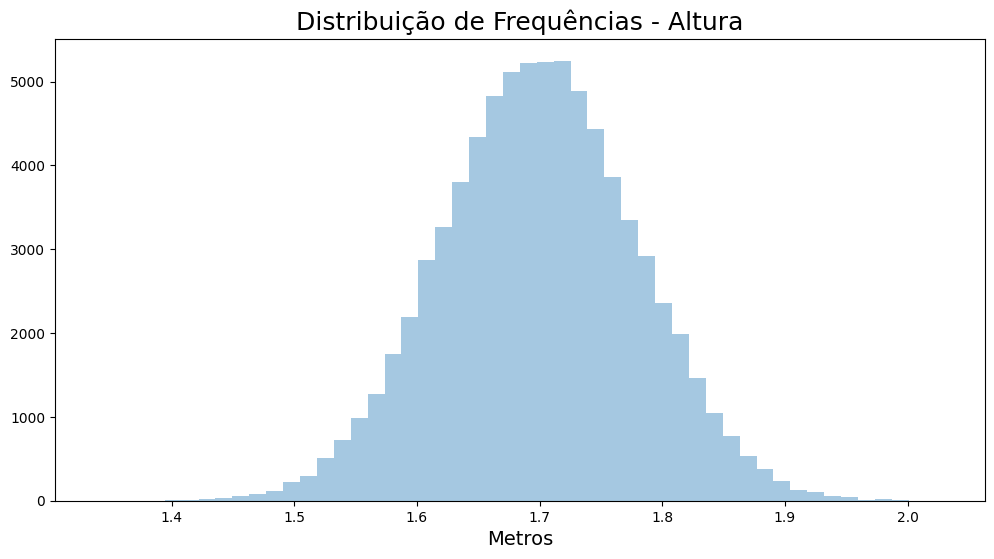

In [487]:
ax = sns.distplot(dados.Altura, kde = False)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

<ipython-input-488-316b2c598edf>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados.Altura)


<Axes: title={'center': 'Distribuição de Frequências - Altura - KDE'}, xlabel='Metros', ylabel='Density'>

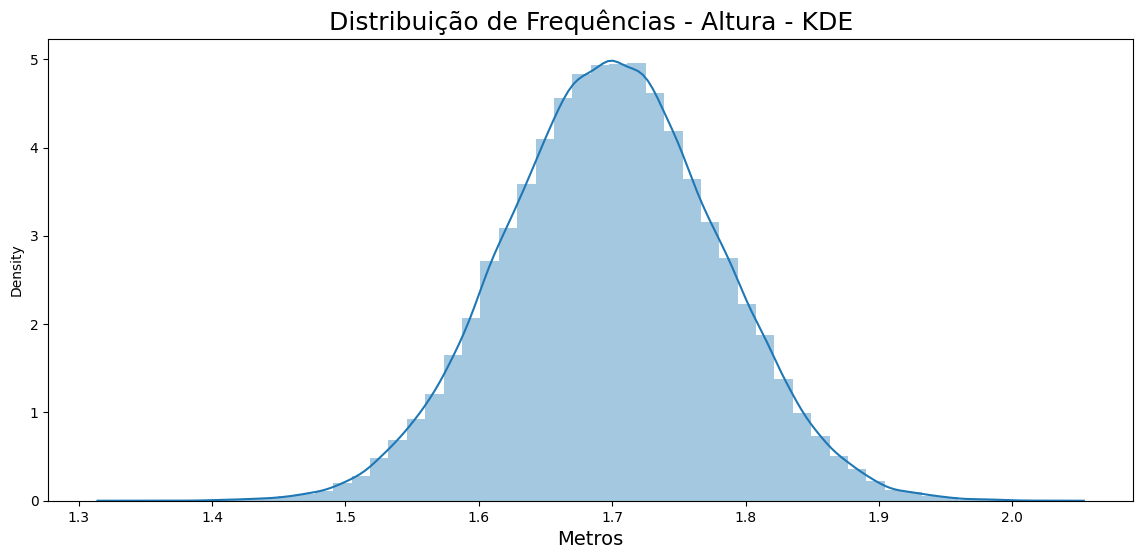

In [488]:
ax = sns.distplot(dados.Altura)

ax.figure.set_size_inches(14, 6)
ax.set_title('Distribuição de Frequências - Altura - KDE', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

<Axes: >

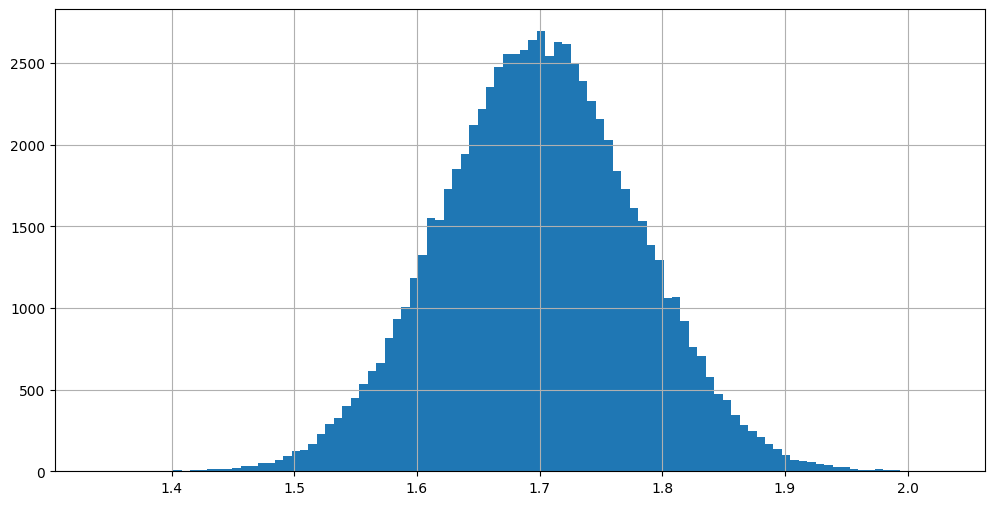

In [489]:
dados.Altura.hist(bins = 100, figsize=(12, 6))

<Axes: >

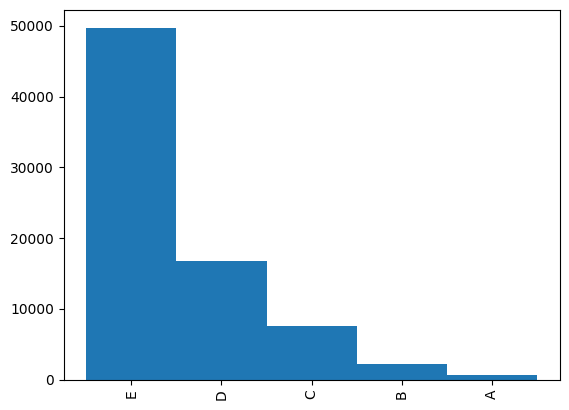

In [490]:
dist_freq_quantitativas['Frequência'].plot.bar(width = 1)

#Medidas de Tendência Central

In [491]:
df = pd.DataFrame(data = {'Fulano': [8, 10, 4, 8, 6, 10, 8],
                          'Beltrano': [10, 2, 0.5, 1, 3, 9.5, 10],
                          'Sicrano': [7.5, 8, 7, 8, 8, 8.5, 7]},
                 index = ['Matemática',
                          'Português',
                          'Inglês',
                          'Geografia',
                          'História',
                          'Física',
                          'Química'])
df.rename_axis('Matérias', axis = 'columns', inplace = True)
df

Matérias,Fulano,Beltrano,Sicrano
Matemática,8,10.0,7.5
Português,10,2.0,8.0
Inglês,4,0.5,7.0
Geografia,8,1.0,8.0
História,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


##Média Aritmética

In [492]:
df.Fulano.mean()

7.714285714285714

In [493]:
dados.Renda.mean()

2000.3831988547631

In [494]:
dados.groupby(['Sexo']).Renda.mean()

Sexo
0    2192.441596
1    1566.847393
Name: Renda, dtype: float64

##Mediana

In [495]:
notas_fulano = df.Fulano.sort_values().reset_index()
notas_fulano

,index,Fulano
0,Inglês,4
1,História,6
2,Matemática,8
3,Geografia,8
4,Química,8
5,Português,10
6,Física,10


In [496]:
n = notas_fulano.shape[0]
n

7

In [497]:
md = (n + 1)/2
md

4.0

In [498]:
notas_fulano.loc[md - 1]

index     Geografia
Fulano            8
Name: 3, dtype: object

In [499]:
dados.Renda.median()

1200.0

In [500]:
dados.Renda.quantile()

1200.0

##Moda

In [501]:
df.mode()

Matérias,Fulano,Beltrano,Sicrano
0,8,10.0,8.0


In [502]:
exemplo = pd.Series([1, 2, 2, 3, 4, 4, 5, 6, 6])
exemplo

0    1
1    2
2    2
3    3
4    4
5    4
6    5
7    6
8    6
dtype: int64

In [503]:
exemplo.mode()

0    2
1    4
2    6
dtype: int64

In [504]:
dados.Altura.mode()

0    1.568128
1    1.671225
2    1.681659
3    1.692977
4    1.708163
5    1.708370
6    1.753842
7    1.779073
8    1.796462
Name: Altura, dtype: float64

##Relações

<ipython-input-505-0bc0b4cbc504>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados.Renda)


<Axes: xlabel='Renda', ylabel='Density'>

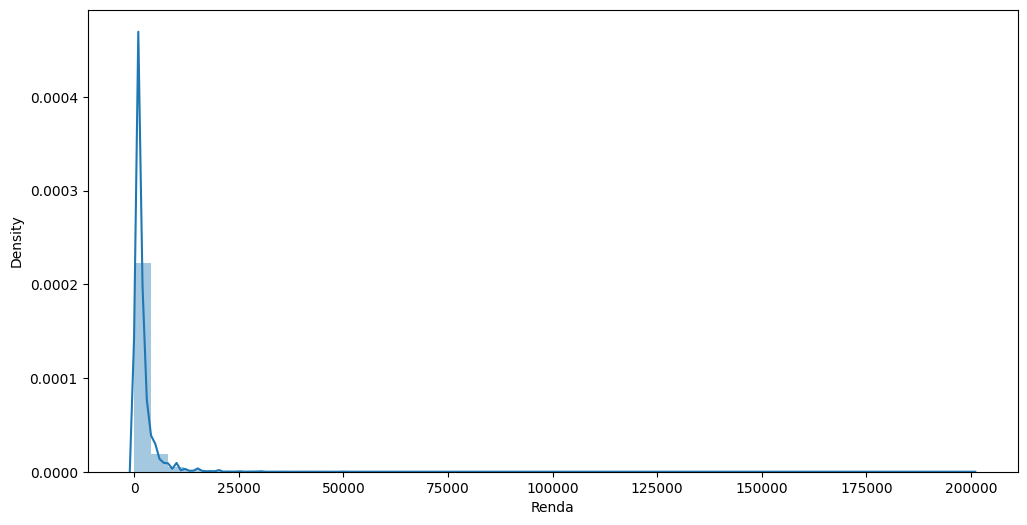

In [505]:
ax = sns.distplot(dados.Renda)
ax.figure.set_size_inches(12, 6)
ax

In [506]:
Moda = dados.Renda.mode()[0]
Moda

788

In [507]:
Mediana = dados.Renda.median()
Mediana

1200.0

In [508]:
Media = dados.Renda.mean()
Media

2000.3831988547631

In [509]:
Moda < Mediana < Media #assimetrica à direita

True

<ipython-input-510-2f874023bd4b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados.Altura)


<Axes: xlabel='Altura', ylabel='Density'>

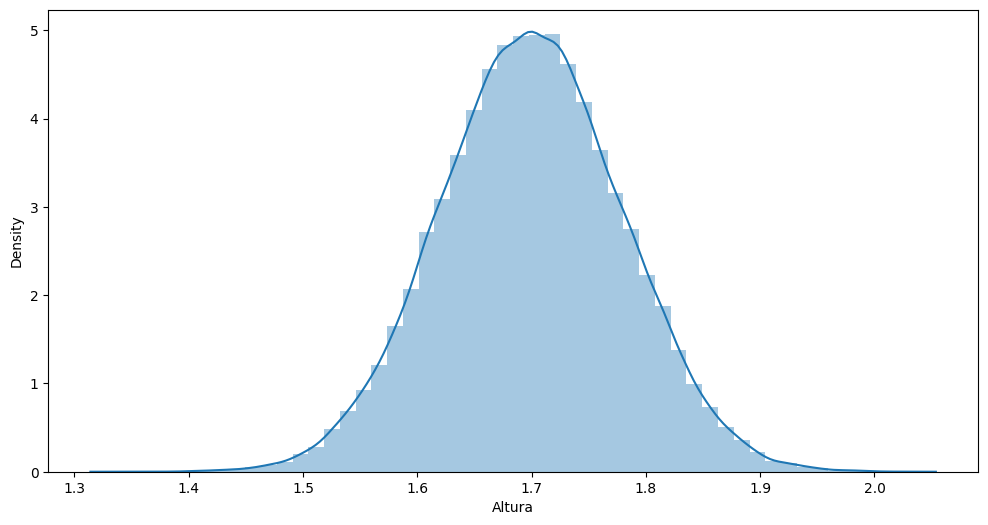

In [510]:
ax = sns.distplot(dados.Altura)
ax.figure.set_size_inches(12, 6)
ax

In [511]:
Moda = dados.Altura.mode()
Moda

0    1.568128
1    1.671225
2    1.681659
3    1.692977
4    1.708163
5    1.708370
6    1.753842
7    1.779073
8    1.796462
Name: Altura, dtype: float64

In [512]:
Mediana = dados.Altura.median()
Mediana

1.6993247325

In [513]:
Media = dados.Altura.mean()
Media

##Simétricas

1.6995124540575741

<ipython-input-514-4d885e2e33e5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados['Anos de Estudo'], bins = 17)


<Axes: xlabel='Anos de Estudo', ylabel='Density'>

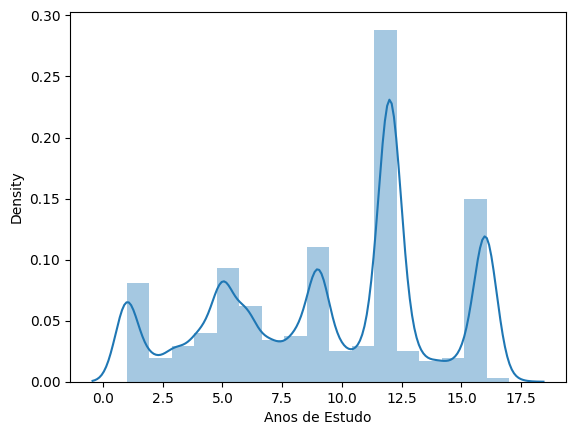

In [514]:
ax = sns.distplot(dados['Anos de Estudo'], bins = 17)
ax

In [515]:
Moda = dados['Anos de Estudo'].mode()[0]
Moda

12

In [516]:
Mediana = dados['Anos de Estudo'].median()
Mediana

11.0

In [517]:
Media = dados['Anos de Estudo'].mean()
Media

9.469664237376367

In [518]:
Moda > Mediana > Media #assimetrica à esquerda

True

#Medidas Separatrizes

##Quartis, Decis e Percentis

In [518]:
#Quartis: 4 partes iguais
#Decis: 10 partes iguais
#Percentis: 100 partes iguais

In [521]:
dados.Renda.quantile([0.25, 0.5, 0.75])

0.25     788.0
0.50    1200.0
0.75    2000.0
Name: Renda, dtype: float64

In [522]:
dados.Renda.quantile([i/10 for i in range(1,10)])

0.1     350.0
0.2     788.0
0.3     800.0
0.4    1000.0
0.5    1200.0
0.6    1500.0
0.7    1900.0
0.8    2500.0
0.9    4000.0
Name: Renda, dtype: float64

In [523]:
dados.Renda.quantile([i/100 for i in range(1,100)])

0.01        0.0
0.02        0.0
0.03        0.0
0.04       50.0
0.05      100.0
         ...   
0.95     6000.0
0.96     7000.0
0.97     8000.0
0.98    10000.0
0.99    15000.0
Name: Renda, Length: 99, dtype: float64

<ipython-input-525-fab347b39bd6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados.Idade,


<Axes: title={'center': 'Distribuição de Frequências Acumulada'}, xlabel='Anos', ylabel='Acumulado'>

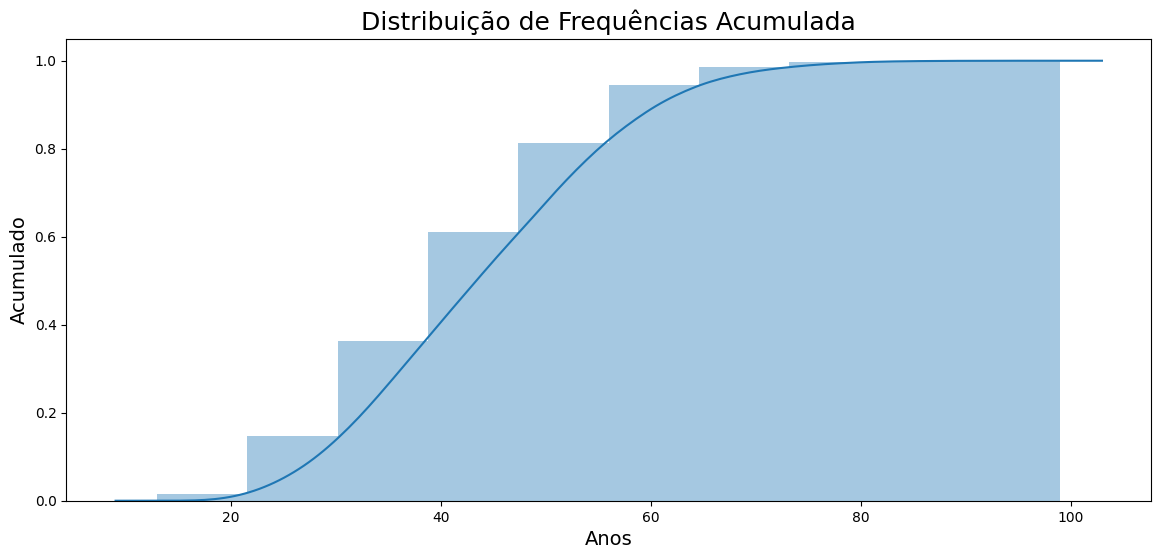

In [525]:
ax = sns.distplot(dados.Idade,
                  hist_kws = {'cumulative': True},
                  kde_kws = {'cumulative': True},
                  bins = 10)
ax.figure.set_size_inches(14, 6)
ax.set_title('Distribuição de Frequências Acumulada', fontsize=18)
ax.set_ylabel('Acumulado', fontsize=14)
ax.set_xlabel('Anos', fontsize=14)
ax

##Box-Plot

Text(0.5, 0, 'Metros')

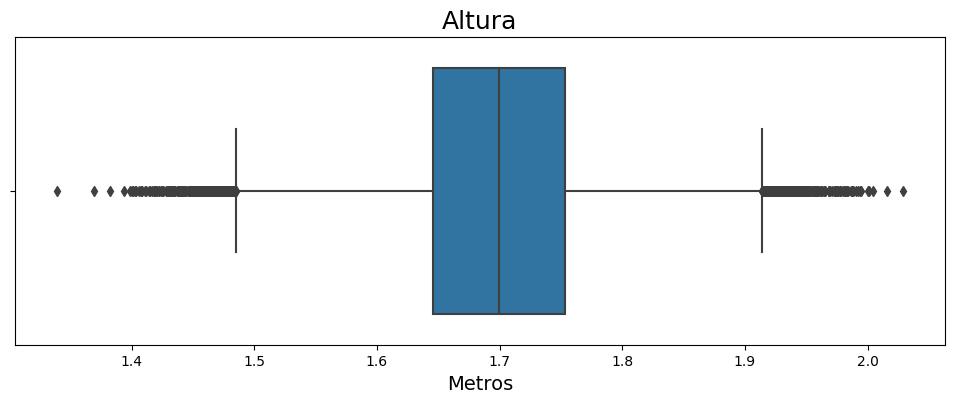

In [530]:
ax = sns.boxplot(x = 'Altura', data = dados, orient = 'h')
ax.figure.set_size_inches(12,4)
ax.set_title('Altura', fontsize = 18)
ax.set_xlabel('Metros', fontsize = 14)

Text(0.5, 0, 'Metros')

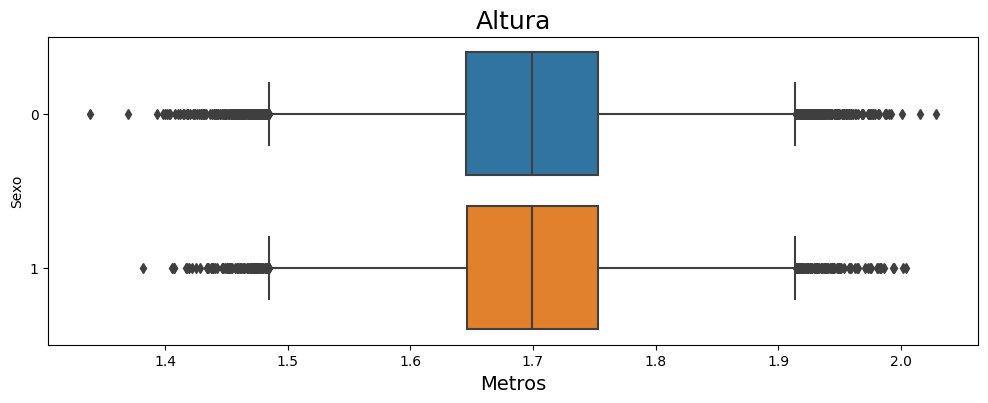

In [532]:
ax = sns.boxplot(x = 'Altura', y = 'Sexo', data = dados, orient = 'h')
ax.figure.set_size_inches(12,4)
ax.set_title('Altura', fontsize = 18)
ax.set_xlabel('Metros', fontsize = 14)

Text(0.5, 0, 'Metros')

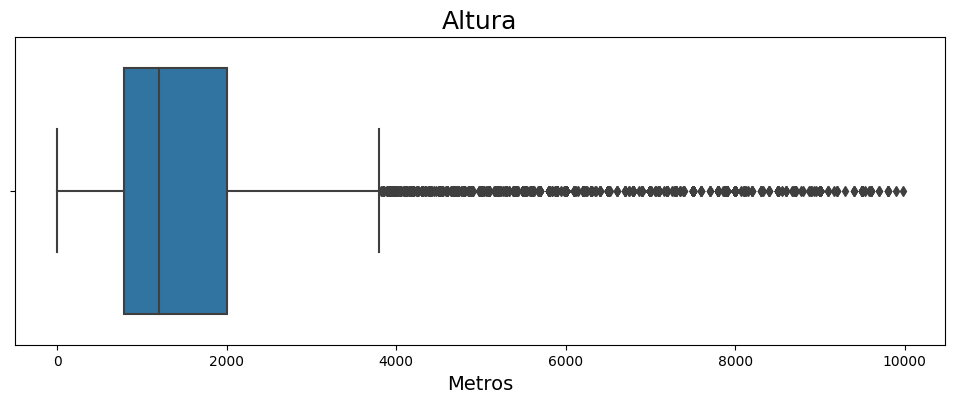

In [535]:
ax = sns.boxplot(x = 'Renda', data = dados.query('Renda < 10000'), orient = 'h')
ax.figure.set_size_inches(12,4)
ax.set_title('Altura', fontsize = 18)
ax.set_xlabel('Metros', fontsize = 14)

Text(0.5, 0, 'Metros')

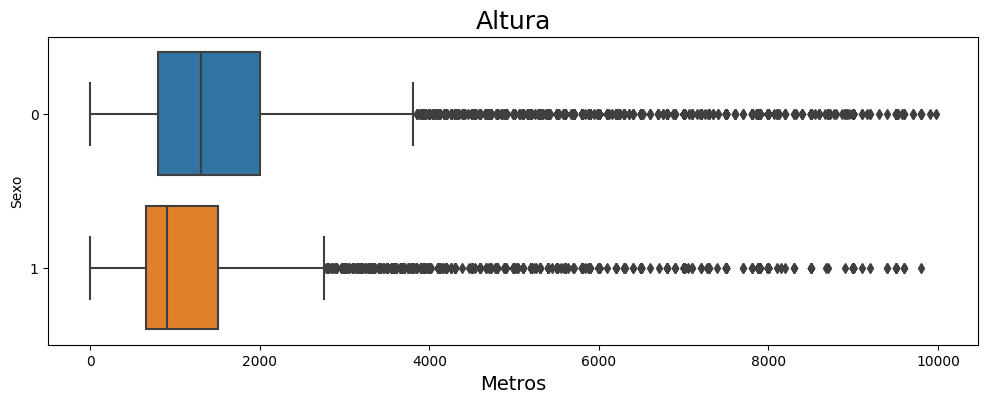

In [536]:
ax = sns.boxplot(x = 'Renda', y = 'Sexo', data = dados.query('Renda < 10000'), orient = 'h')
ax.figure.set_size_inches(12,4)
ax.set_title('Altura', fontsize = 18)
ax.set_xlabel('Metros', fontsize = 14)

Text(0.5, 0, 'Metros')

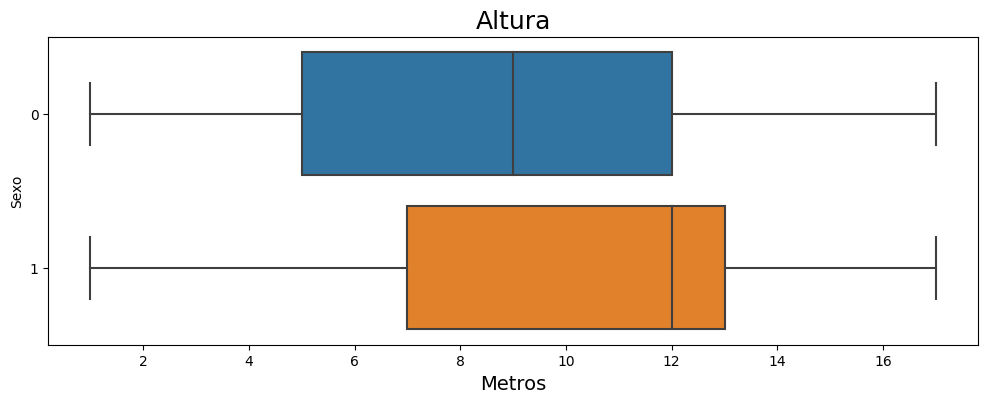

In [538]:
ax = sns.boxplot(x = 'Anos de Estudo', y = 'Sexo', data = dados, orient = 'h')
ax.figure.set_size_inches(12,4)
ax.set_title('Altura', fontsize = 18)
ax.set_xlabel('Metros', fontsize = 14)

#Medidas de Dispersão

##Desvio Médio

In [539]:
df.mean()

Matérias
Fulano      7.714286
Beltrano    5.142857
Sicrano     7.714286
dtype: float64

In [541]:
notas_fulano = df[['Fulano']]
notas_fulano

Matérias,Fulano
Matemática,8
Português,10
Inglês,4
Geografia,8
História,6
Física,10
Química,8


In [543]:
nota_media_fulano = notas_fulano.mean()[0]
nota_media_fulano

7.714285714285714

In [544]:
notas_fulano['Desvio'] = notas_fulano['Fulano'] - nota_media_fulano
notas_fulano

<ipython-input-544-e2160f3efa0b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  notas_fulano['Desvio'] = notas_fulano['Fulano'] - nota_media_fulano


Matérias,Fulano,Desvio
Matemática,8,0.285714
Português,10,2.285714
Inglês,4,-3.714286
Geografia,8,0.285714
História,6,-1.714286
Física,10,2.285714
Química,8,0.285714


In [546]:
notas_fulano['|Desvio|'] = notas_fulano['Desvio'].abs()
notas_fulano

Matérias,Fulano,Desvio,|Desvio|
Matemática,8,0.285714,0.285714
Português,10,2.285714,2.285714
Inglês,4,-3.714286,3.714286
Geografia,8,0.285714,0.285714
História,6,-1.714286,1.714286
Física,10,2.285714,2.285714
Química,8,0.285714,0.285714


In [547]:
desvio_medio = notas_fulano['|Desvio|'].mean()
desvio_medio

1.5510204081632648

In [549]:
desvio_medio_abs = notas_fulano.Fulano.mad()
desvio_medio_abs

<ipython-input-549-f4e124aa6fdd>:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  desvio_medio_abs = notas_fulano.Fulano.mad()


1.5510204081632648

##Variância

In [551]:
notas_fulano['(Desvio)^2'] = notas_fulano['Desvio'].pow(2)
notas_fulano

Matérias,Fulano,Desvio,|Desvio|,(Desvio)^2
Matemática,8,0.285714,0.285714,0.081633
Português,10,2.285714,2.285714,5.224490
Inglês,4,-3.714286,3.714286,13.795918
Geografia,8,0.285714,0.285714,0.081633
História,6,-1.714286,1.714286,2.938776
Física,10,2.285714,2.285714,5.224490
Química,8,0.285714,0.285714,0.081633


In [553]:
variancia = notas_fulano['(Desvio)^2'].sum()/(notas_fulano.shape[0] - 1)
variancia

4.57142857142857

In [554]:
variancia = notas_fulano.Fulano.var()
variancia

4.57142857142857

##Desvio Padrão

In [559]:
import numpy as np
desvio_padrao = np.sqrt(variancia)
desvio_padrao

2.1380899352993947

In [560]:
desvio_padrao = notas_fulano.Fulano.std()
desvio_padrao

2.1380899352993947

Análise

In [568]:
print(f'A média do Fulano é {df.Fulano.mean()} e o desvio padrão é {df.Fulano.std()}.')
print(f'A média do Sicrano é {df.Sicrano.mean()} e o desvio padrão é {df.Sicrano.std()}.\n')

print('Percebe-se que o Sicrano é mais regular.')

A média do Fulano é 7.714285714285714 e o desvio padrão é 2.1380899352993947.
A média do Sicrano é 7.714285714285714 e o desvio padrão é 0.5669467095138409.

Percebe-se que o Sicrano é mais regular.
